<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part8/P8_CH01_01%2C02%2C03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손상된 의류 이미지 화질 복구하기
- AutoEncoder
- FashionMNIST

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

## 1. EDA

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [25]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


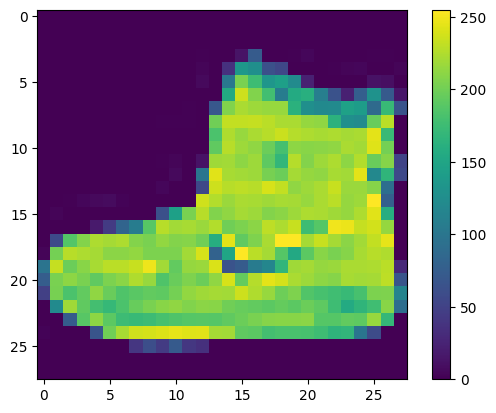

In [26]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [27]:
list(filter(lambda x : x!=0, train_images[0].reshape(-1)))[:10]

[1, 13, 73, 1, 4, 1, 1, 3, 36, 136]

In [28]:
train_images.dtype

dtype('uint8')

## 2. 전처리

In [29]:
print(list(filter(lambda x : x!=0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x!=0, test_images[0].reshape(-1)))[:10])

[1, 13, 73, 1, 4, 1, 1, 3, 36, 136]
[3, 1, 7, 37, 1, 2, 27, 84, 11, 119]


In [30]:
print(min(train_images[0].reshape(-1)), max(train_images[0].reshape(-1)))
print(min(test_images[0].reshape(-1)), max(test_images[0].reshape(-1)))

0 255
0 255


In [31]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

print(train_images.dtype, test_images.dtype)

float64 float64


In [32]:
### 0-1 normalize
train_images = train_images /255.0
test_images = test_images /255.0

In [33]:
print(min(train_images[0].reshape(-1)), max(train_images[0].reshape(-1)))
print(min(test_images[0].reshape(-1)), max(test_images[0].reshape(-1)))

0.0 1.0
0.0 1.0


In [34]:
from skimage import color
print(train_images.shape)
print(color.gray2rgb(train_images[0]).shape) ## 컬러 이미지 형식으로 변경 (채널 확장)

(60000, 28, 28)
(28, 28, 3)


In [35]:
train_images = np.array([color.gray2rgb(img) for img in train_images])
test_images = np.array([color.gray2rgb(img) for img in test_images])

print(train_images.shape, test_images.shape)

(60000, 28, 28, 3) (10000, 28, 28, 3)


## 3. Visualization

In [36]:
train_images[:5].shape

(5, 28, 28, 3)

In [40]:
train_images[:5].transpose(1,0,2,3).reshape(28, 5*28, -1).shape

(28, 140, 3)

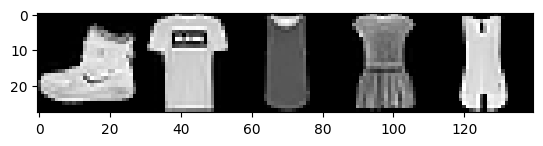

In [41]:
plt.imshow(train_images[:5].transpose(1,0,2,3).reshape(28, 5*28, -1))